In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import glob
import re
import csv

In [2]:
# output_files = glob.glob("imagenet21k_ViT-B_16*output.txt")
output_files = glob.glob("32b/*.txt")
print(output_files)
model_name = output_files[0].partition("_skin")[0]
csv_file_name = model_name + "_metrics.csv"

hyper_params = [
    "batch_size",
    "epochs",
    "max_stop_count",
    "warmup_steps",
    "decay_type",
    "grad_norm_clip",
    "accum_steps",
    "optimizer_type",
    "base_lr",
    "fixed_learning_rate",
    "learning_rate",
    "scheduler",
    "weight_decay",
]

pattern_true = r"binary skin tone (\d+) true .*:\[(.*?)\]"
pattern_predict = r"binary skin tone (\d+) predicted .*:\[(.*?)\]"
# pattern_true = r"^skin tone (\d+) true .*:\[(.*?)\]"
# pattern_predict = r"^skin tone (\d+) predicted .*:\[(.*?)\]"
pattern_loss = r"validation loss\s*=\s*\[(.*?)\]"


header = [
    "Hyper Parameters",
]

metric_types = [
    "Accuracy",
    "Sensitivity",
    "Specificity",
    "Precision",
    "Score",
    "AUC",
]

for i in range(1, 3):
    for metric in metric_types:
        header.append(f"Skin{i} {metric}")

# for i in range(1, 7):
#     for metric in metric_types:
#         header.append(f"Skin{i} {metric}")

print(header)

print(model_name)
with open(csv_file_name, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)

['32b\\torchvision_vit32b_skin_AdamW_0.001_CosineAnnealingLR.txt', '32b\\torchvision_vit32b_skin_AdamW_0.001_default.txt', '32b\\torchvision_vit32b_skin_AdamW_0.001_StepLR.txt', '32b\\torchvision_vit32b_skin_Adam_0.001_default.txt', '32b\\torchvision_vit32b_skin_SGD_Momentum_0.001_CosineAnnealingLR.txt', '32b\\torchvision_vit32b_skin_SGD_Momentum_0.001_default.txt', '32b\\torchvision_vit32b_skin_SGD_Momentum_0.001_StepLR.txt']
['Hyper Parameters', 'Skin1 Accuracy', 'Skin1 Sensitivity', 'Skin1 Specificity', 'Skin1 Precision', 'Skin1 Score', 'Skin1 AUC', 'Skin2 Accuracy', 'Skin2 Sensitivity', 'Skin2 Specificity', 'Skin2 Precision', 'Skin2 Score', 'Skin2 AUC']
32b\torchvision_vit32b


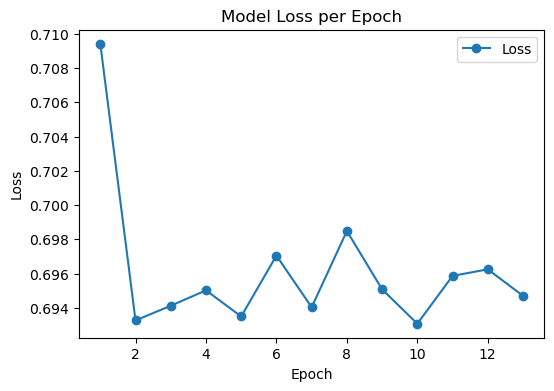

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = AdamW
scheduler = CosineAnnealingLR
batch_size = 32
epochs = 19
max_stop_count = 10
grad_norm_clip = 1


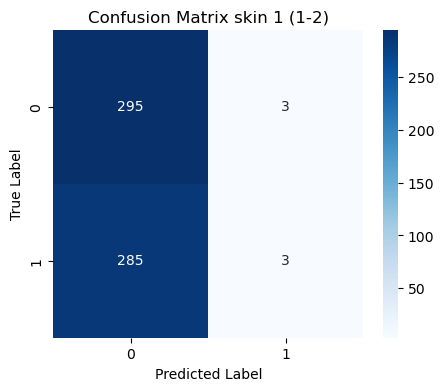

Accuracy: 0.5085
Sensitivity: 0.0104
Specificity: 0.9899
Precision: 0.5000
F1 Score: 0.0204
AUC: 0.5002


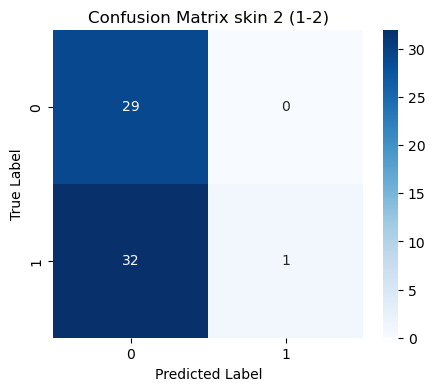

Accuracy: 0.4839
Sensitivity: 0.0303
Specificity: 1.0000
Precision: 1.0000
F1 Score: 0.0588
AUC: 0.5152
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = AdamW  scheduler = CosineAnnealingLR  batch_size = 32  epochs = 19  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.5085', ' 0.0104', ' 0.9899', ' 0.5000', ' 0.0204', ' 0.5002', ' 0.4839', ' 0.0303', ' 1.0000', ' 1.0000', ' 0.0588', ' 0.5152']


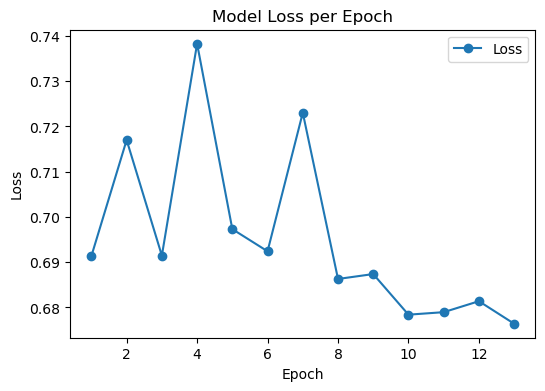

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = AdamW
scheduler = fixed
batch_size = 32
epochs = 22
max_stop_count = 10
grad_norm_clip = 1


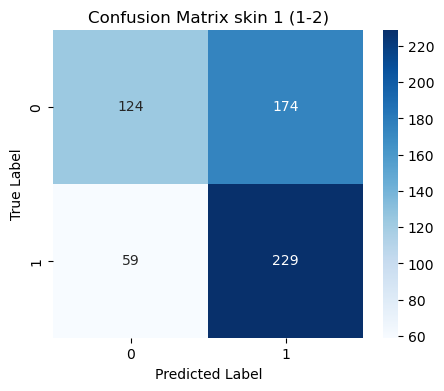

Accuracy: 0.6024
Sensitivity: 0.7951
Specificity: 0.4161
Precision: 0.5682
F1 Score: 0.6628
AUC: 0.6056


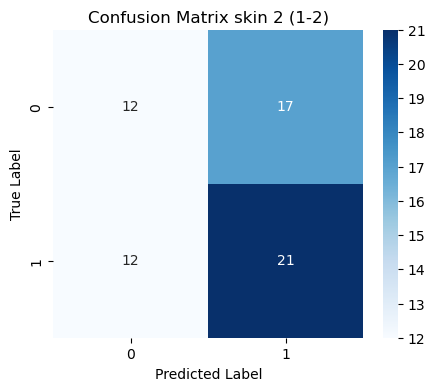

Accuracy: 0.5323
Sensitivity: 0.6364
Specificity: 0.4138
Precision: 0.5526
F1 Score: 0.5915
AUC: 0.5251
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = AdamW  scheduler = fixed  batch_size = 32  epochs = 22  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.6024', ' 0.7951', ' 0.4161', ' 0.5682', ' 0.6628', ' 0.6056', ' 0.5323', ' 0.6364', ' 0.4138', ' 0.5526', ' 0.5915', ' 0.5251']


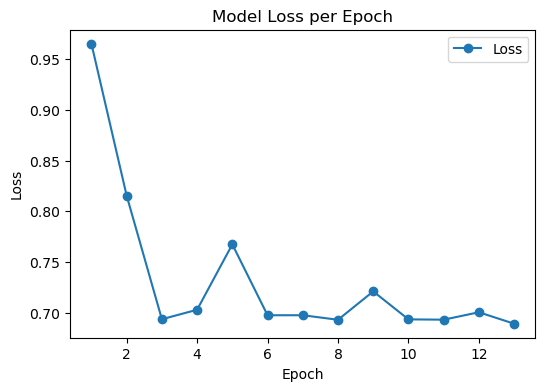

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = AdamW
scheduler = StepLR
batch_size = 32
epochs = 22
max_stop_count = 10
grad_norm_clip = 1


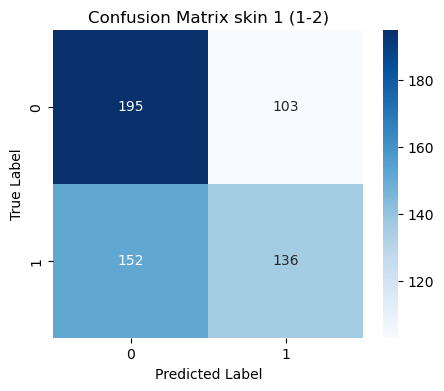

Accuracy: 0.5648
Sensitivity: 0.4722
Specificity: 0.6544
Precision: 0.5690
F1 Score: 0.5161
AUC: 0.5633


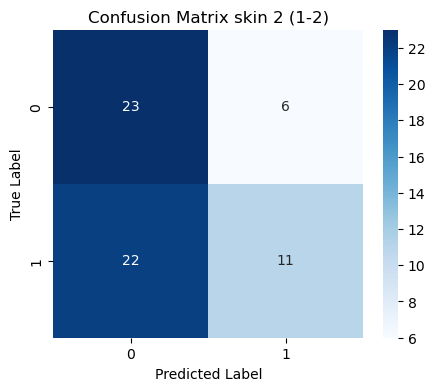

Accuracy: 0.5484
Sensitivity: 0.3333
Specificity: 0.7931
Precision: 0.6471
F1 Score: 0.4400
AUC: 0.5632
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = AdamW  scheduler = StepLR  batch_size = 32  epochs = 22  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.5648', ' 0.4722', ' 0.6544', ' 0.5690', ' 0.5161', ' 0.5633', ' 0.5484', ' 0.3333', ' 0.7931', ' 0.6471', ' 0.4400', ' 0.5632']


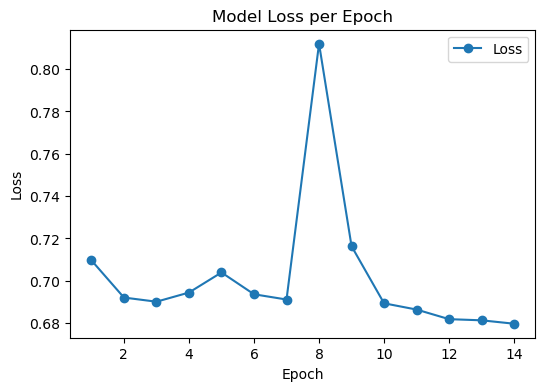

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = Adam
scheduler = fixed
batch_size = 32
epochs = 23
max_stop_count = 10
grad_norm_clip = 1


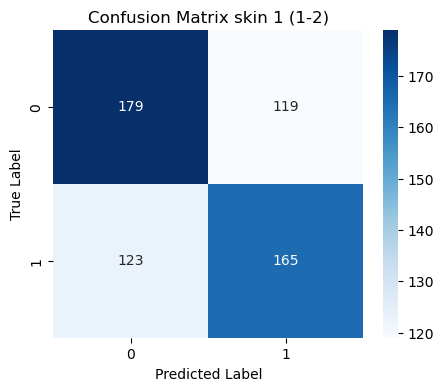

Accuracy: 0.5870
Sensitivity: 0.5729
Specificity: 0.6007
Precision: 0.5810
F1 Score: 0.5769
AUC: 0.5868


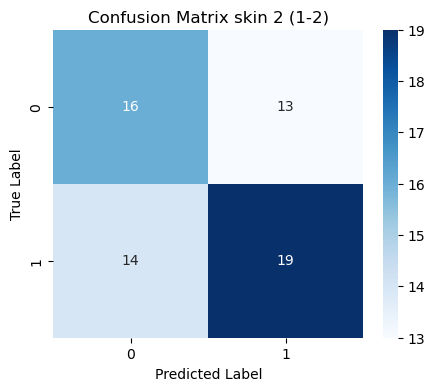

Accuracy: 0.5645
Sensitivity: 0.5758
Specificity: 0.5517
Precision: 0.5938
F1 Score: 0.5846
AUC: 0.5637
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = Adam  scheduler = fixed  batch_size = 32  epochs = 23  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.5870', ' 0.5729', ' 0.6007', ' 0.5810', ' 0.5769', ' 0.5868', ' 0.5645', ' 0.5758', ' 0.5517', ' 0.5938', ' 0.5846', ' 0.5637']


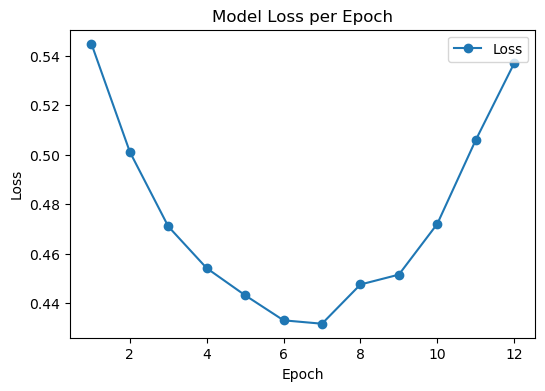

learning_rate = 0.001
weight_decay = 0.0001
scheduler = CosineAnnealingLR
batch_size = 32
epochs = 11
max_stop_count = 5
grad_norm_clip = 1


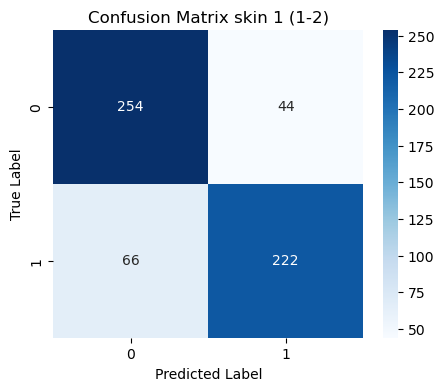

Accuracy: 0.8123
Sensitivity: 0.7708
Specificity: 0.8523
Precision: 0.8346
F1 Score: 0.8014
AUC: 0.8116


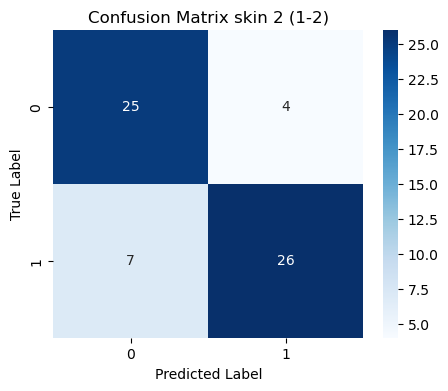

Accuracy: 0.8226
Sensitivity: 0.7879
Specificity: 0.8621
Precision: 0.8667
F1 Score: 0.8254
AUC: 0.8250
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = CosineAnnealingLR  batch_size = 32  epochs = 11  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.8123', ' 0.7708', ' 0.8523', ' 0.8346', ' 0.8014', ' 0.8116', ' 0.8226', ' 0.7879', ' 0.8621', ' 0.8667', ' 0.8254', ' 0.8250']


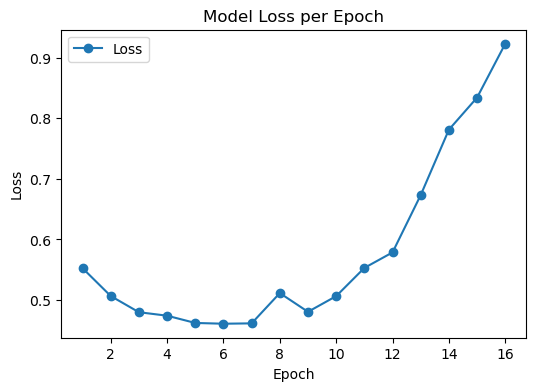

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = SGD
scheduler = fixed
batch_size = 32
epochs = 15
max_stop_count = 10
grad_norm_clip = 1


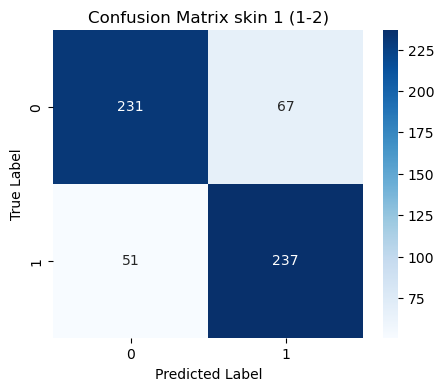

Accuracy: 0.7986
Sensitivity: 0.8229
Specificity: 0.7752
Precision: 0.7796
F1 Score: 0.8007
AUC: 0.7990


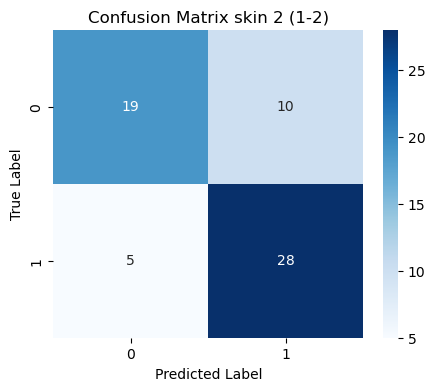

Accuracy: 0.7581
Sensitivity: 0.8485
Specificity: 0.6552
Precision: 0.7368
F1 Score: 0.7887
AUC: 0.7518
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = SGD  scheduler = fixed  batch_size = 32  epochs = 15  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.7986', ' 0.8229', ' 0.7752', ' 0.7796', ' 0.8007', ' 0.7990', ' 0.7581', ' 0.8485', ' 0.6552', ' 0.7368', ' 0.7887', ' 0.7518']


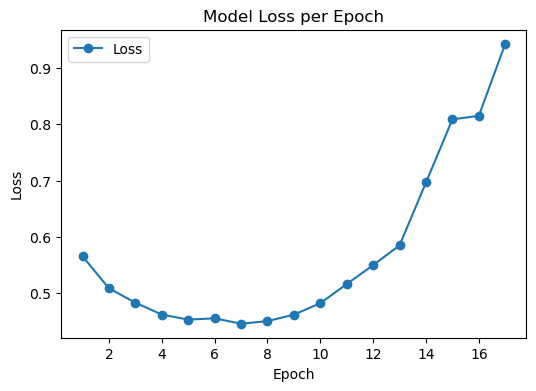

learning_rate = 0.001
weight_decay = 0.0001
optimizer_type = SGD
scheduler = StepLR
batch_size = 32
epochs = 16
max_stop_count = 10
grad_norm_clip = 1


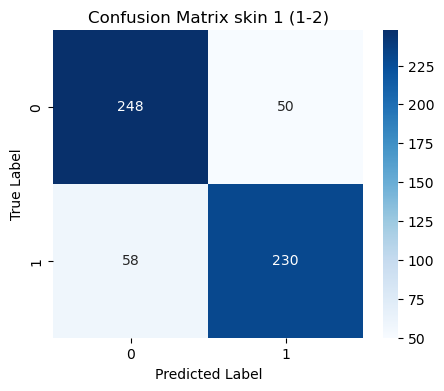

Accuracy: 0.8157
Sensitivity: 0.7986
Specificity: 0.8322
Precision: 0.8214
F1 Score: 0.8099
AUC: 0.8154


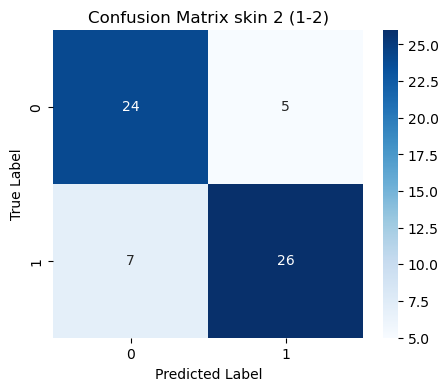

Accuracy: 0.8065
Sensitivity: 0.7879
Specificity: 0.8276
Precision: 0.8387
F1 Score: 0.8125
AUC: 0.8077
['learning_rate = 0.001  weight_decay = 0.0001  optimizer_type = SGD  scheduler = StepLR  batch_size = 32  epochs = 16  max_stop_count = 10  grad_norm_clip = 1  ', ' 0.8157', ' 0.7986', ' 0.8322', ' 0.8214', ' 0.8099', ' 0.8154', ' 0.8065', ' 0.7879', ' 0.8276', ' 0.8387', ' 0.8125', ' 0.8077']


In [3]:
for file_name in output_files:
    skin_tone = -1
    true_labels = None
    predicted_labels = None

    with open(file_name, "r") as file:
        content = file.read()

    sections = [
        section.strip() for section in content.split("Test output:") if section.strip()
    ]

    for section in sections:
        params = ""
        metrics = []
        for line in section.split("\n"):
            if any(keyword in line for keyword in hyper_params):
                print(line.strip())
                params += line.strip() + "\n"

            match_true = re.search(pattern_true, line)
            if match_true:
                skin_tone = int(match_true.group(1))
                true_labels = list(map(int, match_true.group(2).split(", ")))

            match_predicted = re.search(pattern_predict, line)
            if match_predicted:
                skin_tone = int(match_predicted.group(1))
                predicted_labels = list(map(int, match_predicted.group(2).split(", ")))

            match_loss = re.search(pattern_loss, line)
            if match_loss:
                loss_list = match_loss.group(1).split(", ")
                loss_values = list(map(float, loss_list))
                epochs = list(range(1, len(loss_values) + 1))

                # Plot loss curve
                plt.figure(figsize=(6, 4))
                plt.plot(epochs, loss_values, marker="o", linestyle="-", label="Loss")
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Model Loss per Epoch")
                plt.legend()
                plt.show()
                match_loss = None

            if true_labels and predicted_labels:
                cm = confusion_matrix(true_labels, predicted_labels)
                plt.figure(figsize=(5, 4))
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt="d",
                    cmap="Blues",
                    xticklabels=[0, 1],
                    yticklabels=[0, 1],
                )
                plt.xlabel("Predicted Label")
                plt.ylabel("True Label")
                if line.startswith("binary"):
                    plt.title(f"Confusion Matrix skin {skin_tone} (1-2)")
                else:
                    plt.title(f"Confusion Matrix skin  {skin_tone} (1-6)")
                plt.show()

                tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

                # Metrics calculation
                accuracy = accuracy_score(true_labels, predicted_labels)
                sensitivity = recall_score(
                    true_labels, predicted_labels
                )  # Same as recall
                specificity = tn / (tn + fp)  # True Negative Rate
                precision = precision_score(true_labels, predicted_labels)
                f1 = f1_score(true_labels, predicted_labels)
                auc = roc_auc_score(true_labels, predicted_labels)

                metric = ""
                # Print results
                # if line.startswith("binary"):
                #     metric += f"Skin {skin_tone} (1-2)\n"
                # else:
                #     metric += f"Skin {skin_tone} (1-6)\n"
                metric += f"Accuracy: {accuracy:.4f}\n"
                metric += f"Sensitivity: {sensitivity:.4f}\n"
                metric += f"Specificity: {specificity:.4f}\n"
                metric += f"Precision: {precision:.4f}\n"
                metric += f"F1 Score: {f1:.4f}\n"
                metric += f"AUC: {auc:.4f}"
                print(metric)
                metrics.append(metric)
                true_labels = None
                predicted_labels = None

        params = params.replace("\n", "  ")
        metrics.insert(0, params)
        metrics = [line for metric in metrics for line in metric.split("\n")]
        metrics = [
            metric.split(":")[1] if ":" in metric else metric for metric in metrics
        ]
        print(metrics)
        with open(csv_file_name, "a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(metrics)